In [29]:
# pip install pykan
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# pip install scikit-learn
# pip install matplotlib
# pip install tqdm

In [30]:
from kan import *
from sympy import *
import torch
import numpy as np
import matplotlib.pyplot as plt

---------------------------------------------------------------------------------------------------------------------------------------------------

In [42]:
def f_symp():
    x, y = symbols('x y')
    expression = tanh(-(x**2+y**2))
    latex_expression = latex(expression)
    return expression, latex_expression

f_symp()

# '\\[\\tanh(-(x^2+y^2))\\]';

(-tanh(x**2 + y**2), '- \\tanh{\\left(x^{2} + y^{2} \\right)}')

In [31]:
def f_RadialTanh(x, y):
    # z = (1/(2*torch.pi))*torch.exp(-(x**2+y**2)/2)
    z = torch.tanh(-(x**2+y**2))
    return z

Plot

In [32]:
x_range = (-2.0, 2.0)
y_range = (-2.0, 2.0)
z_range = (-1.0, 0.0)

x = np.linspace(*x_range, num=30)
y = np.linspace(*y_range, num=30)
xv, yv = np.meshgrid(x, y)
xv, yv = torch.tensor(xv), torch.tensor(yv)
zv = f_RadialTanh(xv, yv)

xv.shape, yv.shape, zv.shape

(torch.Size([30, 30]), torch.Size([30, 30]), torch.Size([30, 30]))

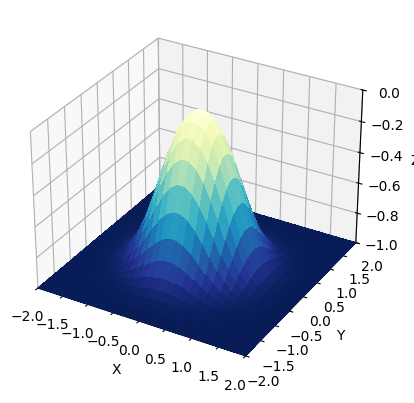

In [33]:
from matplotlib import cm

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = xv.numpy(), yv.numpy(), zv.numpy()

# Plot the 3D surface
# ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,alpha=0.3)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r, linewidth=0, antialiased=False)


ax.set(xlim=x_range, ylim=y_range, zlim=z_range,
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

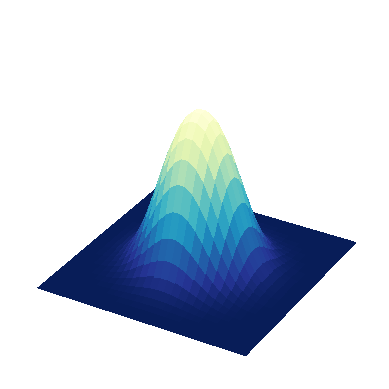

In [34]:
from matplotlib import cm

x_range = (-2.0, 2.0)
y_range = (-2.0, 2.0)
z_range = (-1.0, 0.0)

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = xv.numpy(), yv.numpy(), zv.numpy()

# Plot the 3D surface
# ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,alpha=0.3)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r, linewidth=0, antialiased=False)


ax.set(xlim=x_range, ylim=y_range, zlim=z_range)
ax.grid(False)
# Hide axes ticks
plt.axis('off')
plt.show()

KAN

In [35]:
f = lambda x: f_RadialTanh(x[:,[0]], x[:,[1]])
dataset = create_dataset(f, n_var=2, train_num=1000, test_num=200)
# dataset['train_input'].shape, dataset['train_label'].shape
xv_train, yv_train, zv_label = dataset['train_input'][:,[0]], dataset['train_input'][:,[1]], dataset['train_label']
xv_test, yv_test, zv_test_label = dataset['test_input'][:,[0]], dataset['test_input'][:,[1]], dataset['test_label']
xv_train.shape, yv_train.shape, zv_label.shape, xv_test.shape, yv_test.shape, zv_test_label.shape

(torch.Size([1000, 1]),
 torch.Size([1000, 1]),
 torch.Size([1000, 1]),
 torch.Size([200, 1]),
 torch.Size([200, 1]),
 torch.Size([200, 1]))

In [36]:
xv_train.min(), xv_train.max(), yv_train.min(), yv_train.max(), xv_test.min(), xv_test.max(), yv_test.min(), yv_test.max()

(tensor(-0.9998),
 tensor(0.9997),
 tensor(-0.9991),
 tensor(0.9982),
 tensor(-0.9961),
 tensor(0.9782),
 tensor(-0.9980),
 tensor(0.9905))

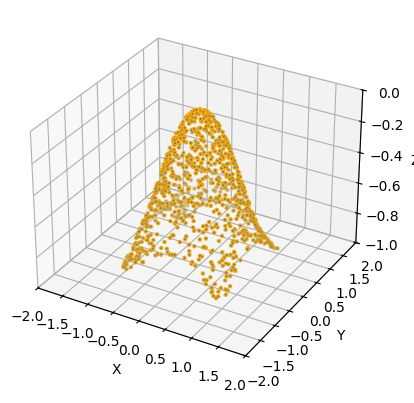

In [37]:
from matplotlib import cm

ax = plt.figure().add_subplot(projection='3d')
X_train, Y_train, Z_label = xv_train.numpy(), yv_train.numpy(), zv_label.numpy()
X_test, Y_test, Z_test_label = xv_test.numpy(), yv_test.numpy(), zv_test_label.numpy()

# Plot the 3D surface
ax.scatter(X_train, Y_train, Z_label, edgecolor='orange', marker='.')
# ax.scatter(X_test, Y_test, Z_test_label, edgecolor='yellow', marker='.')

ax.set(xlim=x_range, ylim=y_range, zlim=z_range,
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

In [38]:

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model_init = KAN(width=[2,1,1,1], grid=5, k=3, seed=0)

In [39]:
# # create dataset f(x,y) = exp(sin(pi*x)+y^2)
# f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)

# create dataset f(x,y) = (1/2*pi)*exp(-(x^2+y^2)/2)
# f = lambda x: (1/(2*torch.pi))*torch.exp(-(x[:,[0]]**2+x[:,[1]]**2)/2)
f = lambda x: f_RadialTanh(x[:,[0]], x[:,[1]])
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape, dataset['test_input'].shape, dataset['test_label'].shape

(torch.Size([1000, 2]),
 torch.Size([1000, 1]),
 torch.Size([1000, 2]),
 torch.Size([1000, 1]))

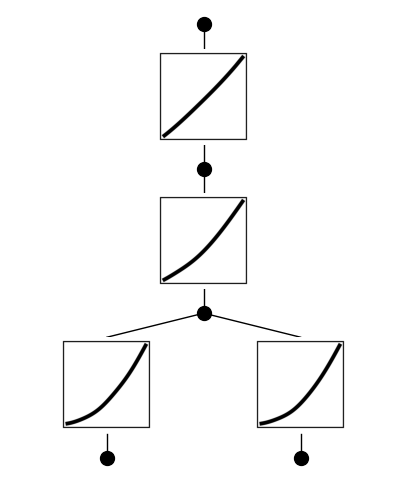

In [40]:
# plot KAN at initialization
model_init(dataset['train_input']);
model_init.plot(beta=100)

In [151]:
# grids, k = np.array([5,10,15,20,25,30,32,34]), 5  # train loss: 1.16e-01 | test loss: 1.71e-01
# grids, k = np.array([5,10,15,20,25]), 5  # train loss: 8.10e-02 | test loss: 1.10e-01
# grids, k = np.array([5,10,15,20,25]), 4  # train loss: 1.55e-01 | test loss: 2.02e-01
# grids, k = np.array([5,10,15,20,25]), 6  # train loss: 6.21e-02 | test loss: 7.63e-02
grids, k = np.array([5,10,15,20,25]), 7  # train loss: 9.52e-04 | test loss: 9.99e-04

train_losses = []
test_losses = []
steps = 50
# k = 4

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,1,1,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[2,1,1,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

train loss: 1.04e-03 | test loss: 1.03e-03 | reg: 3.19e+00 : 100%|██| 50/50 [01:00<00:00,  1.21s/it]
train loss: 3.39e-03 | test loss: 3.35e-03 | reg: 6.46e+00 : 100%|██| 50/50 [01:02<00:00,  1.25s/it]
train loss: 8.63e-02 | test loss: 1.02e-01 | reg: 2.31e+01 : 100%|██| 50/50 [01:03<00:00,  1.27s/it]
train loss: 1.33e-03 | test loss: 1.33e-03 | reg: 5.67e+00 : 100%|██| 50/50 [01:05<00:00,  1.30s/it]
train loss: 9.52e-04 | test loss: 9.99e-04 | reg: 5.44e+00 : 100%|██| 50/50 [01:04<00:00,  1.30s/it]


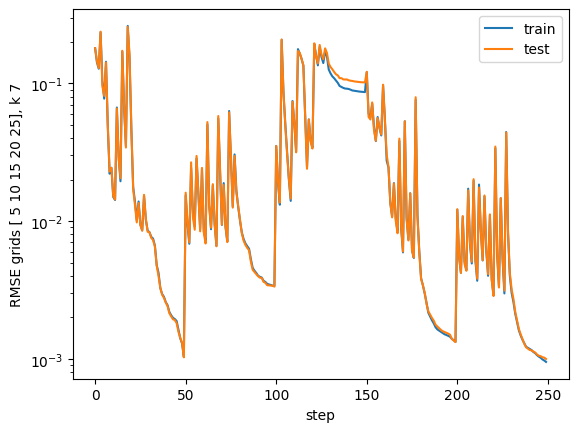

In [152]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE grids {}, k {}'.format(grids, k))
plt.xlabel('step')
plt.yscale('log')

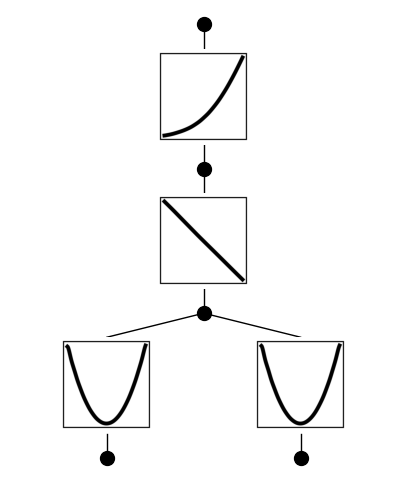

In [153]:
model.plot(beta=50)

--------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
def model_fn(grid, k):
    model = KAN(width=[2,1,1,1], grid=grid, k=k)
    model(dataset['train_input']);

    # mode = "manual"
    mode = "manual"

    if mode == "manual":
        # manual mode
        model.fix_symbolic(0,0,0,'x^2');
        model.fix_symbolic(0,1,0,'x^2');
        model.fix_symbolic(1,0,0,'x');
        model.fix_symbolic(2,0,0,'tanh');
    elif mode == "auto":
        # automatic mode
        lib = ['x','x^2','x^3','x^4','exp','log','sqrt','sin','abs']
        model.auto_symbolic(lib=lib)
    return model

In [17]:
model = model_fn(10, 3)
model.train(dataset, opt="LBFGS", steps=50);

NameError: name 'dataset' is not defined

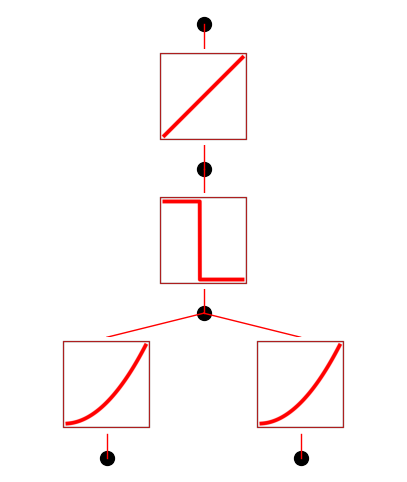

In [143]:
model.plot(beta=70)

In [78]:
SYMBOLIC_LIB.keys()

dict_keys(['x', 'x^2', 'x^3', 'x^4', '1/x', '1/x^2', '1/x^3', '1/x^4', 'sqrt', '1/sqrt(x)', 'exp', 'log', 'abs', 'sin', 'tan', 'tanh', 'sigmoid', 'sgn', 'arcsin', 'arctan', 'arctanh', '0', 'gaussian', 'cosh'])

-------------------------------------------------------------------------------------------------------------------------------------------------

CACHE

In [ ]:
# grids, k = np.array([5,10,15,20,25]), 3
# grids, k = np.array([5,15,20,25,35]), 4    # train loss: 6.13e-02 | test loss: 1.00e-01 
# grids, k = np.array([5,10,15,20,25]), 5    # train loss: 7.30e-02 | test loss: 8.52e-02
# grids, k = np.array([5,10,15,20,25]), 6    # train loss: 1.39e-01 | test loss: 1.52e-01 
# grids, k = np.array([10,20,30,40,50]), 3   # train loss: 9.80e-02 | test loss: 1.28e-01
# grids, k = np.array([10,20,30,40,50]), 4   # train loss: 1.10e-01 | test loss: 1.16e-01
# grids, k = np.array([10,20,30,40,50]), 5   # train loss: 8.27e-02 | test loss: 1.37e-01
# grids, k = np.array([10,15,20,25,30,35]), 5  # train loss: 6.54e-02 | test loss: 7.40e-02
# grids, k = np.array([15,20,25,30,35,40]), 5  # train loss: 7.97e-02 | test loss: 9.17e-02
# grids, k = np.array([10,15,20,25,30,35,40]), 5  # train loss: 5.35e-02 | test loss: 6.87e-02  train loss: 6.45e-02 | test loss: 4.79e-01
# grids, k = np.array([5,10,15,20,25,30,35,40]), 5  # train loss: 3.93e-02 | test loss: 6.89e-02
grids, k = np.array([5,10,15,20,25,30,35,40,45]), 5  # train loss: 3.98e-02 | test loss: 6.12e-02  train loss: 4.57e-02 | test loss: 7.40e-02
# grids, k = np.array([5,10,15,20,21,22,23,24,25]), 5  # train loss: 5.54e-02 | test loss: 7.05e-02
# grids, k = np.array([5,10,15,20,25,30,35,40,41]), 5  # train loss: 3.96e-02 | test loss: 6.67e-02